In [1]:
# Mount

from google.colab import drive

drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
cd "drive/My Drive"

/content/drive/My Drive


# #1 U-Net for Segmentation

<br />

"zhixuhao/unet"


https://github.com/zhixuhao/unet

In [3]:
from new_dataset import *
from unet_cloned.data import *
from unet_cloned.model import *

Using TensorFlow backend.


## Train My U-Net with Data Generator

In [0]:
data_gen_args = dict(rotation_range=0.2,
                     width_shift_range=0.05,
                     height_shift_range=0.05,
                     shear_range=0.05,
                     zoom_range=0.05,
                     horizontal_flip=True,
                     fill_mode='nearest')

myGene = trainGenerator(2, 'new_dataset/train/rwanda', 'image',
                        'label', data_gen_args, save_to_dir=None)

model = unet()

model_checkpoint = ModelCheckpoint(
    'weight/unet1.hdf5', monitor='loss', verbose=1, save_best_only=True)

model.fit_generator(myGene, steps_per_epoch=500,
                    epochs=5, callbacks=[model_checkpoint])

/content/drive/My Drive/unet_cloned/model.py:55: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`
  model = Model(input = inputs, output = conv10)


Epoch 1/5
Found 50 images belonging to 1 classes.
Found 50 images belonging to 1 classes.
500/500 [==============================] - 396s 791ms/step - loss: 0.0058 - acc: 1.0000

Epoch 00001: loss improved from inf to 0.00581, saving model to weight/unet1.hdf5
Epoch 2/5
500/500 [==============================] - 391s 782ms/step - loss: 1.0000e-07 - acc: 1.0000

Epoch 00002: loss improved from 0.00581 to 0.00000, saving model to weight/unet1.hdf5
Epoch 3/5
500/500 [==============================] - 394s 789ms/step - loss: 1.0000e-07 - acc: 1.0000

Epoch 00003: loss did not improve from 0.00000
Epoch 4/5
500/500 [==============================] - 395s 791ms/step - loss: 1.0000e-07 - acc: 1.0000

Epoch 00004: loss did not improve from 0.00000
Epoch 5/5
500/500 [==============================] - 395s 790ms/step - loss: 1.0000e-07 - acc: 1.0000

Epoch 00005: loss did not improve from 0.00000


## Test The Model and Save The Results

In [15]:
testGene = testGenerator("new_dataset/test/rwanda")

model = unet()

model.load_weights("weight/unet1.hdf5")

results = model.predict_generator(testGene, 30, verbose=1)

saveResult("new_dataset/prediction/unet1/rwanda", results)

/content/drive/My Drive/unet_cloned/model.py:55: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`
  model = Model(input = inputs, output = conv10)
/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


30/30 [==============================] - 20s 662ms/step


/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: new_dataset/prediction/unet1/rwanda/0_predict.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/dist-packages/skimage/util/dtype.py:141: UserWarning: Possible precision loss when converting from float32 to uint16
  .format(dtypeobj_in, dtypeobj_out))
/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: new_dataset/prediction/unet1/rwanda/1_predict.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: new_dataset/prediction/unet1/rwanda/2_predict.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/dist-packages/skimage/io/_io.py:140: UserWarning: new_dataset/prediction/unet1/rwanda/3_predict.png is a low contrast image
  warn('%s is a low contrast image' % fname)
/usr/local/lib/python3.6/dist-packages/skima

## Check The Results

In [1]:
from IPython.display import Image, display_png

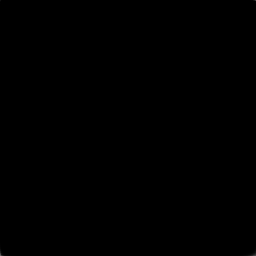

In [2]:
display_png(Image("new_dataset/prediction/unet1/rwanda/0_predict.png"))